# Instalando Pacotes e importando o gráfico com as cotações do Yahoo

In [ ]:
# pip install pandas-datareader    ( No prompt do Anaconda)
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import pandas_datareader.data as web 


# Criando e editando o gráfico

<AxesSubplot:xlabel='Date'>

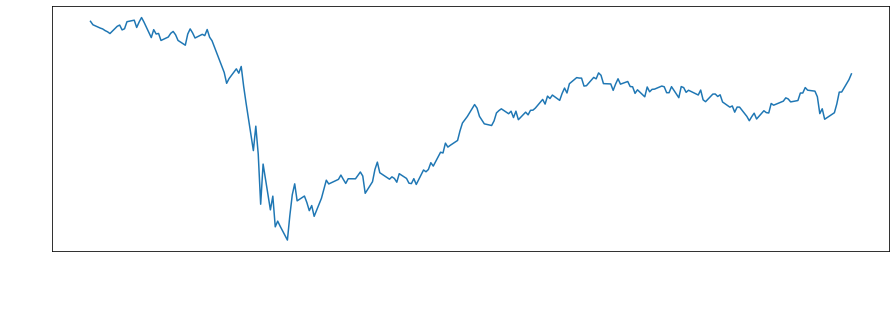

In [16]:
cotacao_ibov = web.DataReader('^BVSP', data_source = 'yahoo', start = '2020-01-01', end = '2020-11-10' ) # Importando os dados do Yahoo Finance
fig = plt.figure()
ax = fig.add_subplot(111)
ax.tick_params(axis='x', colors='white') #Editando a cor das labels do eixo x
ax.tick_params(axis='y', colors='white') #Editando a cor das labels do eixo y
ax.xaxis.label.set_color('white') #Editando a cor do subplot 


cotacao_ibov['Adj Close'].plot(figsize=(15,5))  # Plotando o 'Adj Close', que é o preço de fechamento e ajustando o seu tamanho

# Calculando o Retorno no período

In [24]:
# Calculando a variação do Ibovespa dividindo o último valor ([-1]) pelo primeiro valor da tabela ([0])
retorno_ibov = cotacao_ibov['Adj Close'][-1] / cotacao_ibov['Adj Close'][0] - 1 
print('Retorno IBOV: {:.2%}'.format(retorno_ibov)) # Printando o valor e formatando ele em porcentagem com duas casas decimais 

Retorno IBOV: -11.15%


# Criando um gráfico com médias móveis

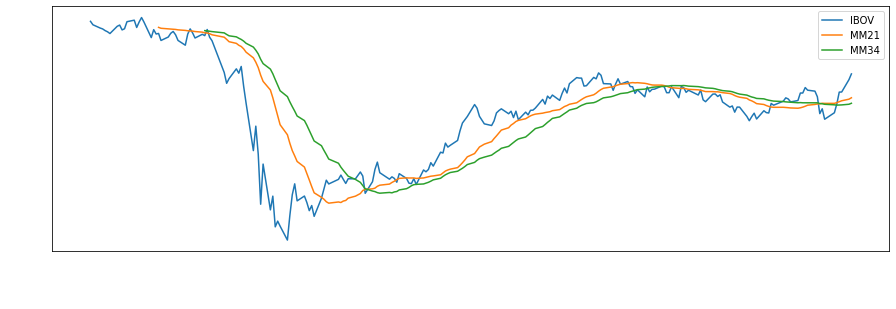

In [28]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.tick_params(axis='x', colors='white') #Editando a cor das labels do eixo x
ax.tick_params(axis='y', colors='white') #Editando a cor das labels do eixo y
ax.xaxis.label.set_color('white') #Editando a cor do subplot 
cotacao_ibov['Adj Close'].plot(figsize=(15,5), label = 'IBOV')  # Plotando o 'Adj Close', que é o preço de fechamento e ajustando o seu tamanho
cotacao_ibov['Adj Close'].rolling(21).mean().plot(label = 'MM21') # Criando a média movel de 21 dias
cotacao_ibov['Adj Close'].rolling(34).mean().plot(label = 'MM34')

plt.legend() # Preciso para rodar as legendas do gráfico
plt.show()

# Importando a carteira do excel

In [32]:
carteira = pd.read_excel('Carteira.xlsx') # Importando o nome dos ativos e as respectivas quantidades 
display(carteira)

,Ativos,Tipo,Qtde
0,BOVA11,ETF,100
1,SMAL11,ETF,100
2,MGLU3,Ação,1000
3,BBDC4,Ação,100
4,ITUB4,Ação,100
5,ENEV3,Ação,300
6,MOVI3,Ação,100
7,BPAC11,Ação,100
8,GNDI3,Ação,100
9,NTCO3,Ação,100


# Inserindo os ativos e suas cotações em um novo DataFrame

In [39]:
cotacoes_carteira = pd.DataFrame()  # Criando um DataFrame em branco para inserir as cotações

for ativo in carteira['Ativos']: # Criando um for para percorrer toda a planilha e pegar o preço de fechamento de todos os ativos
# Utilizei o try e except para que ele indique quando um ativo não for encontrado, mostrando assim o seu nome
    try:
        cotacoes_carteira[ativo] = web.DataReader('{}.SA'.format(ativo), data_source = 'yahoo', start = '2020-01-01', end = '2020-11-10')['Adj Close']
    
    except:
        print('Deu erro com {}'.format(ativo))
        pass
        
display(cotacoes_carteira)

Deu erro com GNDI3


,BOVA11,SMAL11,MGLU3,BBDC4,ITUB4,ENEV3,MOVI3,BPAC11,NTCO3,BCRI11,VILG11,KNRI11,XPLG11
Date,,,,,,,,,,,,,
2020-01-02,114.239998,139.500000,12.029735,25.794868,35.616173,10.9650,18.078861,18.235773,38.093487,123.043831,146.925858,195.954865,NaN
2020-01-03,113.800003,140.899994,11.922434,25.807919,35.241573,11.0675,18.558992,18.288692,40.747009,124.516182,144.953705,195.954865,NaN
2020-01-06,112.589996,139.100006,11.932190,25.346943,34.717106,11.3500,18.627523,18.262236,39.882378,123.541115,146.491989,194.364441,NaN
2020-01-07,112.239998,139.399994,11.898048,24.906601,33.911694,11.2650,18.590338,18.335094,40.528366,123.706879,141.827835,195.120392,NaN
2020-01-08,111.949997,138.199997,12.263844,24.521309,33.359131,11.2125,18.683290,18.172600,40.737072,121.464226,137.528519,184.075821,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-04,94.160004,112.000000,26.143793,15.818968,23.945604,14.4000,17.233248,18.344759,47.375851,104.819809,125.202530,155.487625,125.046349
2020-11-05,96.949997,115.900002,27.401571,16.063757,24.510717,14.6775,18.237125,19.155304,49.969746,104.819809,126.592911,155.291290,125.340202
2020-11-06,97.190002,117.510002,27.281780,16.025505,24.481985,14.7925,18.804129,19.365267,50.317589,104.673553,126.247772,155.546524,127.338440


# Corrigindo dados vazios

In [41]:
cotacoes_carteira.info() # Podemos ver que o XPLG11 não possui cotação em todos os dias 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 215 entries, 2020-01-02 to 2020-11-10
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   BOVA11  215 non-null    float64
 1   SMAL11  215 non-null    float64
 2   MGLU3   215 non-null    float64
 3   BBDC4   215 non-null    float64
 4   ITUB4   215 non-null    float64
 5   ENEV3   215 non-null    float64
 6   MOVI3   215 non-null    float64
 7   BPAC11  215 non-null    float64
 8   NTCO3   215 non-null    float64
 9   BCRI11  215 non-null    float64
 10  VILG11  215 non-null    float64
 11  KNRI11  215 non-null    float64
 12  XPLG11  110 non-null    float64
dtypes: float64(13)
memory usage: 23.5 KB


In [49]:
cotacoes_carteira = cotacoes_carteira.bfill()  # Preenchendo os valores nulos com o último valor
cotacoes_carteira.info() 

# Normalizando a carteira

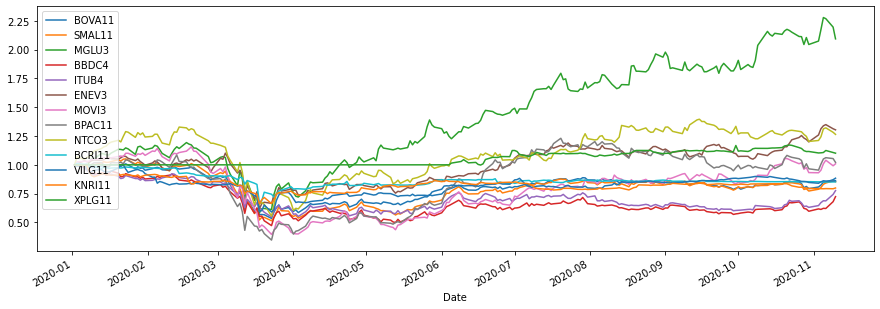

In [53]:
# Normalizando a carteira para plotar o gráfico
carteira_norm = cotacoes_carteira / cotacoes_carteira.iloc[0]  #Utilizei o iloc porque na primeira linha fica o titulo
carteira_norm.plot(figsize=(15,5))
plt.legend(loc='upper left')

# Criando um DataFrame que replica o valor investido da carteira

In [56]:
valor_investido = pd.DataFrame()

for ativo in carteira['Ativos']:
    try:
        valor_investido[ativo] = cotacoes_carteira[ativo] * carteira.loc[carteira['Ativos']==ativo, 'Qtde'].values[0]
# localizando a cotação e a quantidade para chegarmos ao montante investido 
# Para encontrar a quantidade do ativo utilizamos a função loc, que encontra a quantidade de acordo com o nome do ativo na tabela carteira
    except:
        print('Deu erro com {}'.format(ativo))
        pass
display(valor_investido)

Deu erro com GNDI3


,BOVA11,SMAL11,MGLU3,BBDC4,ITUB4,ENEV3,MOVI3,BPAC11,NTCO3,BCRI11,VILG11,KNRI11,XPLG11
Date,,,,,,,,,,,,,
2020-01-02,11423.999786,13950.000000,12029.734612,2579.486847,3561.617279,3289.500046,1807.886124,1823.577309,3809.348679,12304.383087,14692.585754,19595.486450,11324.304962
2020-01-03,11380.000305,14089.999390,11922.433853,2580.791855,3524.157333,3320.250034,1855.899239,1828.869247,4074.700928,12451.618195,14495.370483,19595.486450,11324.304962
2020-01-06,11258.999634,13910.000610,11932.189941,2534.694290,3471.710587,3405.000114,1862.752342,1826.223564,3988.237762,12354.111481,14649.198914,19436.444092,11324.304962
2020-01-07,11223.999786,13939.999390,11898.048401,2490.660095,3391.169357,3379.500103,1859.033775,1833.509445,4052.836609,12370.687866,14182.783508,19512.039185,11324.304962
2020-01-08,11194.999695,13819.999695,12263.843536,2452.130890,3335.913086,3363.749886,1868.329048,1817.259979,4073.707199,12146.422577,13752.851868,18407.582092,11324.304962
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-04,9416.000366,11200.000000,26143.793106,1581.896782,2394.560432,4319.999886,1723.324776,1834.475899,4737.585068,10481.980896,12520.252991,15548.762512,12504.634857
2020-11-05,9694.999695,11590.000153,27401.571274,1606.375694,2451.071739,4403.249931,1823.712540,1915.530396,4996.974564,10481.980896,12659.291077,15529.129028,12534.020233
2020-11-06,9719.000244,11751.000214,27281.780243,1602.550507,2448.198509,4437.749863,1880.412865,1936.526680,5031.758881,10467.355347,12624.777222,15554.652405,12733.843994


# Calculando o retorno da carteira através de uma nova coluna (total)

In [60]:
valor_investido['Total'] = valor_investido.sum(axis=1)
display(valor_investido)

,BOVA11,SMAL11,MGLU3,BBDC4,ITUB4,ENEV3,MOVI3,BPAC11,NTCO3,BCRI11,VILG11,KNRI11,XPLG11,Total
Date,,,,,,,,,,,,,,
2020-01-02,11423.999786,13950.000000,12029.734612,2579.486847,3561.617279,3289.500046,1807.886124,1823.577309,3809.348679,12304.383087,14692.585754,19595.486450,11324.304962,224383.821869
2020-01-03,11380.000305,14089.999390,11922.433853,2580.791855,3524.157333,3320.250034,1855.899239,1828.869247,4074.700928,12451.618195,14495.370483,19595.486450,11324.304962,224887.764549
2020-01-06,11258.999634,13910.000610,11932.189941,2534.694290,3471.710587,3405.000114,1862.752342,1826.223564,3988.237762,12354.111481,14649.198914,19436.444092,11324.304962,223907.736588
2020-01-07,11223.999786,13939.999390,11898.048401,2490.660095,3391.169357,3379.500103,1859.033775,1833.509445,4052.836609,12370.687866,14182.783508,19512.039185,11324.304962,222917.144966
2020-01-08,11194.999695,13819.999695,12263.843536,2452.130890,3335.913086,3363.749886,1868.329048,1817.259979,4073.707199,12146.422577,13752.851868,18407.582092,11324.304962,219642.189026
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-04,9416.000366,11200.000000,26143.793106,1581.896782,2394.560432,4319.999886,1723.324776,1834.475899,4737.585068,10481.980896,12520.252991,15548.762512,12504.634857,228814.535141
2020-11-05,9694.999695,11590.000153,27401.571274,1606.375694,2451.071739,4403.249931,1823.712540,1915.530396,4996.974564,10481.980896,12659.291077,15529.129028,12534.020233,234175.814438
2020-11-06,9719.000244,11751.000214,27281.780243,1602.550507,2448.198509,4437.749863,1880.412865,1936.526680,5031.758881,10467.355347,12624.777222,15554.652405,12733.843994,234939.213943


# Normalizando e comparando a carteira com o IBOV em um gráfico

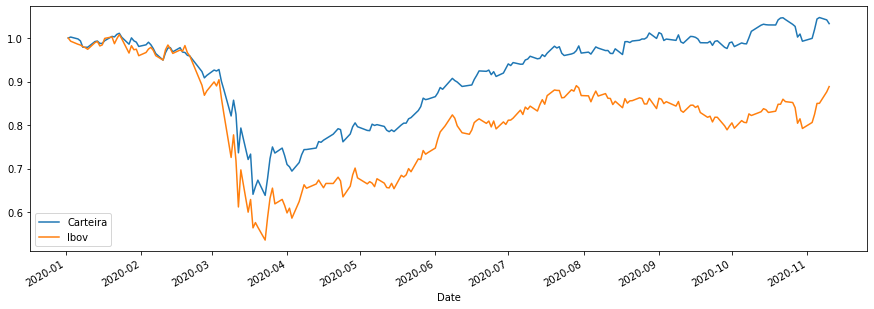

In [65]:

valor_investido_norm = valor_investido / valor_investido.iloc[0]  # normalizando os valores
cotacao_ibov_norm = cotacao_ibov / cotacao_ibov.iloc[0]  # normalizando os valores

valor_investido_norm['Total'].plot(figsize=(15,5), label='Carteira')
cotacao_ibov_norm['Adj Close'].plot(figsize=(15,5), label='Ibov')

plt.legend()
plt.show()

# Calculando o retorno da carteira e do IBOV

In [64]:
retorno_carteira = valor_investido['Total'][-1] / valor_investido['Total'][0] - 1
retorno_ibov = cotacao_ibov['Adj Close'][-1] / cotacao_ibov['Adj Close'][0] - 1

print('O retorno da carteira foi de: {:.2%}'.format(retorno_carteira))
print('O retorno do IBOV foi de: {:.2%}'.format(retorno_ibov))

O retorno da carteira foi de: 3.30%
O retorno do IBOV foi de: -11.15%


# Calculo da correlação da carteira com o IBOV

In [66]:
correlacao = valor_investido['Total'].corr(cotacao_ibov['Adj Close'])

print(correlacao)

0.8583057847580589
